### Wrangling Data

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
#load in data
googleplayers <- 'https://drive.google.com/file/d/1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz/edit'

#Turn google drive link into a direct link to load in the data
direct_link_players <- 'https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz'

players <- read_csv(direct_link_players)

head(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


In [8]:
players_tidy <- players |> 
mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) |> 
       unclass()) |> 
select(experience, played_hours, age) 
head(players)

experience,played_hours,age
<int>,<dbl>,<dbl>
4,30.3,9
5,3.8,17
5,0.0,17
2,0.7,21
3,0.1,21
2,0.0,17


### Summary and Exploratory Visualization

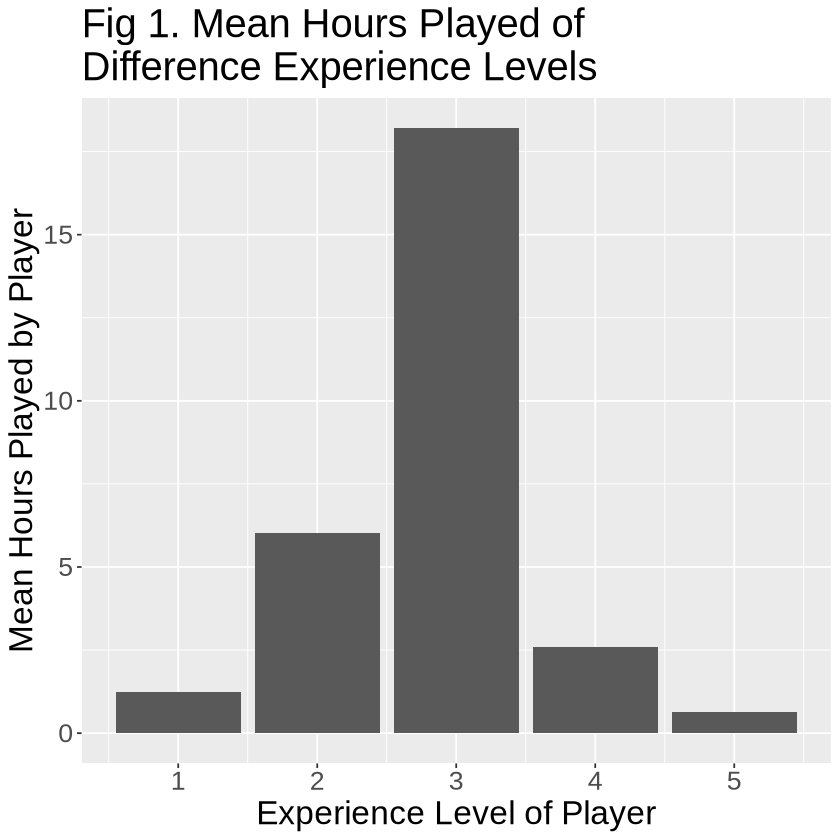

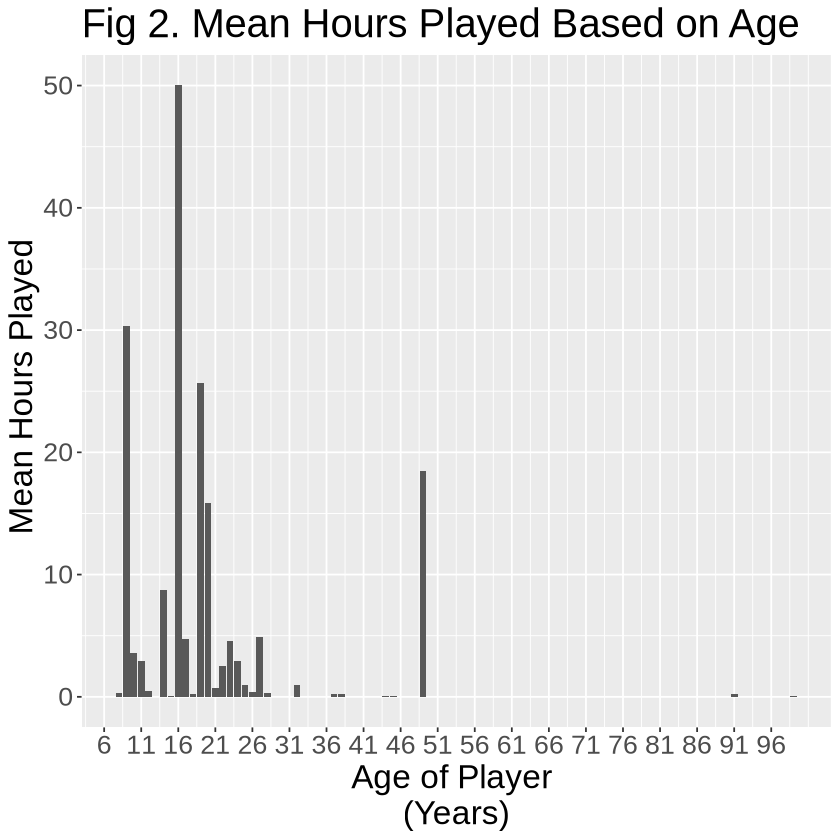

In [13]:
#graphing the amount of mean hours played by the different experience leveled players 
exp_hours_mean<-players|>
group_by(experience)|>
summarize(mean_exp = mean(played_hours))

players_h_vs_exp<- exp_hours_mean|>
                   ggplot(aes(x = experience, y = mean_exp))+
                   ggtitle("Fig 1. Mean Hours Played of \nDifference Experience Levels")+
                   geom_bar(stat = "identity")+
                   labs( x = "Experience Level of Player", y = "Mean Hours Played by Player") +
                   theme(text = element_text(size = 20))
players_h_vs_exp


#graphing the amount of mean hours played by the different aged players 

age_hours_mean<-players|>
group_by(age)|>
summarize(mean_age = mean(played_hours))

players_h_vs_age<- age_hours_mean|>
                   ggplot(aes(x = age, y = mean_age))+
                   ggtitle("Fig 2. Mean Hours Played Based on Age")+
                   geom_bar(stat = "identity")+
                   labs( x = "Age of Player \n(Years)", y = " Mean Hours Played")+
                   theme(text = element_text(size = 20))+
                   scale_x_continuous(breaks = seq(1,100, by = 5)) 
players_h_vs_age

#graphing the amount of mean hours played by the different gendered players 


### Data Analysis

In [5]:
#Recipe + spliting the data 

data_split <- intial_spilt(players, prop = .75, strata = played_hours) 
players_training <- training(data_split) 
players_testing <- testing(data_split) 

recipe <- recipe(played_hours ~ ., data = players) |> 
step_center(all_predictors()) |> 
step_scale(all_predictors())

ERROR: Error in intial_spilt(players, prop = 0.75, strata = played_hours): could not find function "intial_spilt"
